### Charting the Path to Sustainability: Integrating Land Sector Data with SDGs

#### Task 1- Land sector management in Kenya : Exploratory Data Analysis (EDA)


   ### INTRODUCTION 
Kenya is among the 7 Members of the East African Community. It is boarded by Tanzania, Uganda, Ethiopia, Somalia and the Indian Ocean. Nairobi is Kenya’s capital city. It has an area of 224,081 square miles (580,367 square kilometers). Kenya is also famous for its land, the Great Rift valley that runs from the Northen part all the way to the Southern part of the country. Kenya has an extensive vegetation coverage, with Savannas being the common. Other ecosystems include Mountains, Forests, deserts, and swamps. Kenya’s highland forests are the home to many animals found nowhere else in the world.  Aberdare Range and Mau Escarpment are the major mountain ranges while Athi and Tana are the major rivers. It also shares Lake Victoria with Tanzania, and Uganda. 
   #### Objective
The main goal of this phase of the project is to carry out exploratory data analysis in order to draw insights on the administrative, Bioclimatic and ecological zones, Land cover, Climate and Soil types in Kenya.

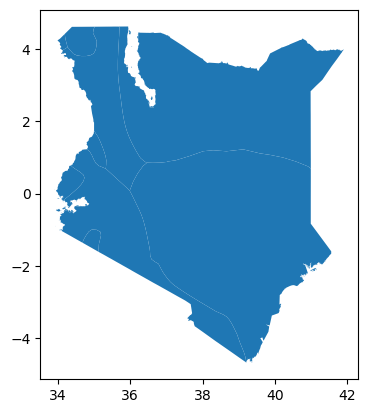

In [1]:
!pip install geopandas 

     ---------------------------------------- 1.1/1.1 MB 416.4 kB/s eta 0:00:00
     ---------------------------------------- 22.9/22.9 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 6.1/6.1 MB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 643.5 kB/s eta 0:00:00


### Importing Libraries 

In [59]:

import geopandas as gpd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 1. ADMINISTRATIVE

In [44]:
kenya_adm=gpd.read_file(r"C:\Users\Samoei\Downloads\KEN_AL2_Kenya.json")
kenya_adm

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,KEN,,Kenya,Kenya,Kenya,,administrative,2,Q114,en:Kenya,2019-03-22 23:19:02,"MULTIPOLYGON (((39.37506 -4.71945, 39.37096 -4..."


<AxesSubplot:>

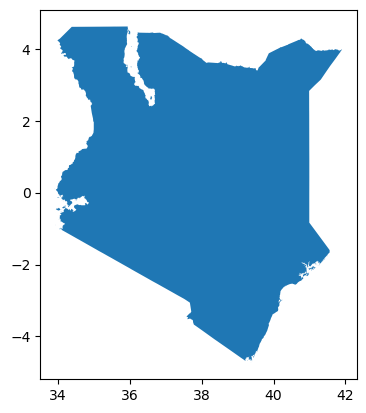

In [45]:
kenya_adm.plot()

### States 

In [67]:
kenya_admin_states= gpd.read_file(r"C:\Users\Samoei\Desktop\git projects\KEN_ALL_states_WSR.json")
kenya_admin_states.head()

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,KEN,KE-01,Baringo,CL,29,Calcisol,4,"POLYGON ((36.39474 0.91128, 36.39374 0.91405, ..."
1,KEN,KE-01,Baringo,LP,18,Leptosol,4,"POLYGON ((36.16862 1.16874, 36.13331 1.16783, ..."
2,KEN,KE-01,Baringo,LX,6,Lixisol,4,"POLYGON ((36.47982 0.85381, 36.46734 0.85421, ..."
3,KEN,KE-01,Baringo,NT,24,Nitisol,4,"MULTIPOLYGON (((35.98588 0.07785, 35.98096 0.0..."
4,KEN,KE-02,Bomet,NT,24,Nitisol,4,"POLYGON ((35.58790 -0.58973, 35.58631 -0.58674..."


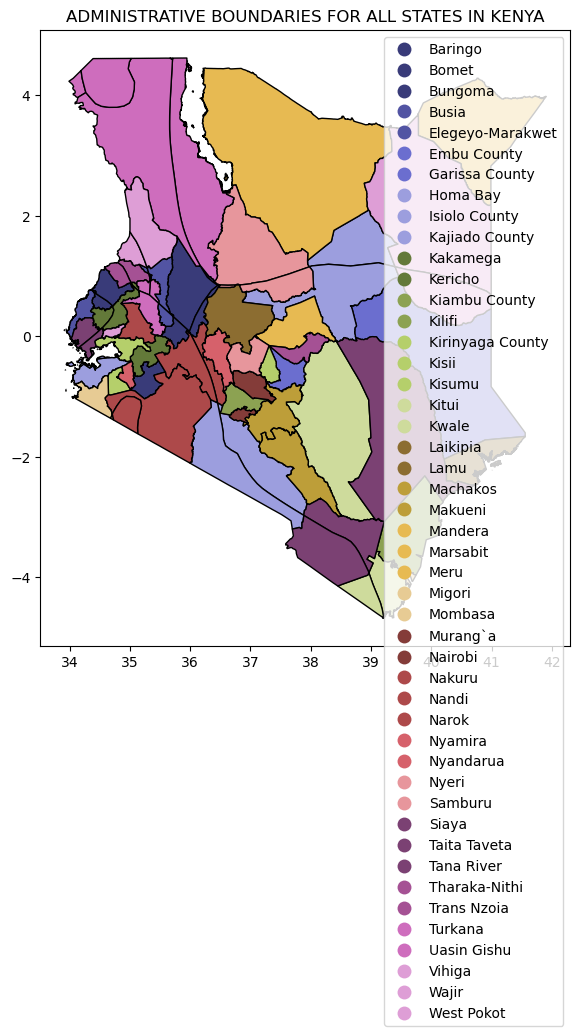

In [139]:
# Plotting all administrative states/counties in Kenya
fig, ax = plt.subplots(figsize=(12,8))
kenya_admin_states.plot(column='name',edgecolor="black",cmap = 'tab20b',ax=ax, legend=True)
plt.title("ADMINISTRATIVE BOUNDARIES FOR ALL STATES IN KENYA")
legend.set_bbox_to_anchor((1.7, 1)) 
plt.show()

### Roads

In [89]:
world_road =gpd.read_file(r'C:\Users\Samoei\Desktop\git projects\Global_Roads_Open_Access_Data_Set.json')
world_road.head()

,OBJECTID,ONME,FCLASS,SRFTPE,ISSEASONAL,CURNTPRAC,GDWTHRPRAC,SUM_LENGTH_KM,geometry
0,1,None,0,0.0,0.0,NaN,NaN,16686.65607,"LINESTRING (-66.82451 17.98029, -66.82455 17.9..."
1,2,None,0,0.0,0.0,NaN,NaN,16686.65607,"LINESTRING (-66.62012 17.98131, -66.62126 17.9..."
2,3,None,0,0.0,0.0,NaN,NaN,16686.65607,"LINESTRING (-66.11382 17.98409, -66.11319 17.9..."
3,4,None,0,0.0,0.0,NaN,NaN,16686.65607,"LINESTRING (-66.63308 18.01087, -66.63256 18.0..."
4,5,None,0,0.0,0.0,NaN,NaN,16686.65607,"LINESTRING (-66.63308 18.01087, -66.63332 18.0..."


In [90]:
# Performing a spatial join to select roads within Kenya
kenyan_road = gpd.sjoin(world_road, kenya_adm, how="inner", op="intersects")

# Reset the index of the resulting GeoDataFrame
kenyan_road.reset_index(drop=True, inplace=True)

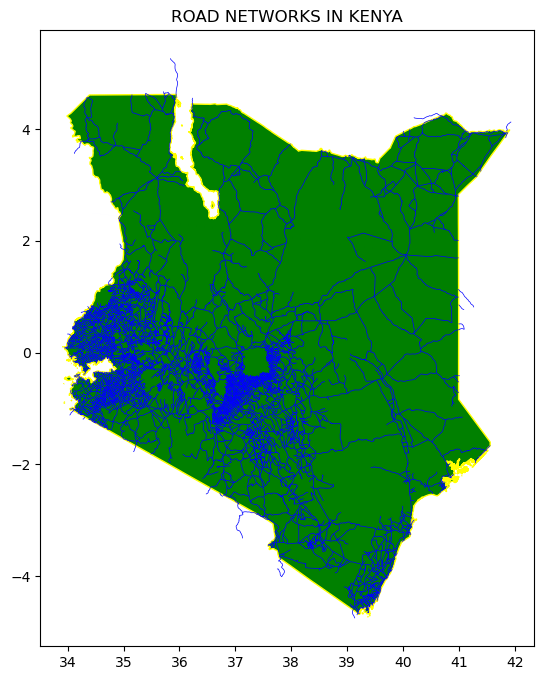

In [91]:
# Creating plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the administrative boundaries
kenya_adm.plot(ax=ax, color="green", edgecolor="yellow")

# Plot the road network
kenyan_road.plot(ax=ax, color="blue", linewidth=0.5)

plt.title("ROAD NETWORKS IN KENYA")

plt.show()

# BIOCLIMATIC AND ECOLOGICAL ZONES

### Ecological zones

In [88]:
kenya_ecological=gpd.read_file(r'C:\Users\Samoei\Desktop\git projects\KEN_AL2_Kenya_GEZ.json')
kenya_ecological.head()

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,KEN,,Kenya,Tropical dry forest,13,TAwb,2,"MULTIPOLYGON (((34.76935 -0.29384, 34.76875 -0..."
1,KEN,,Kenya,Tropical moist forest,12,TAwa,2,"MULTIPOLYGON (((39.59500 -4.06283, 39.59465 -4..."
2,KEN,,Kenya,Tropical mountain system,16,TM,2,"MULTIPOLYGON (((38.45417 -3.34256, 38.41297 -3..."
3,KEN,,Kenya,Tropical rainforest,11,TAr,2,"MULTIPOLYGON (((39.22227 -4.66908, 39.22226 -4..."
4,KEN,,Kenya,Tropical shrubland,14,TBSh,2,"MULTIPOLYGON (((36.41257 -1.41796, 36.38317 -1..."


In [93]:
kenya_ecological["gez_name"].value_counts()

Tropical dry forest         1
Tropical moist forest       1
Tropical mountain system    1
Tropical rainforest         1
Tropical shrubland          1
Water                       1
Name: gez_name, dtype: int64

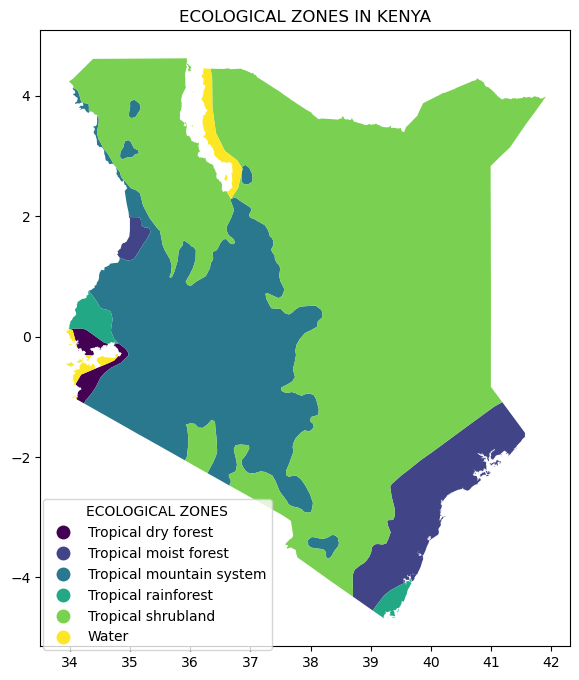

In [100]:
# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the ecological zones
kenya_ecological.plot(column="gez_name", cmap="viridis", ax=ax, legend=True)

plt.title("ECOLOGICAL ZONES IN KENYA")

# Add a legend
legend = ax.get_legend()
legend.set_title("ECOLOGICAL ZONES")
legend.set_bbox_to_anchor((0.45, 0.25)) 

plt.show()

### Agroecological Zones

In [113]:
import json
with open(r"C:\Users\Samoei\Desktop\git projects\GlobalAgroEcologicalZones_GAEZ.geojson") as file:
    agroecology = json.load(file)

In [114]:
worldagro_data = gpd.GeoDataFrame.from_features(agroecology['features'])
worldagro_data.head()

,geometry,Value
0,"POLYGON ((-33.50000 83.65000, -33.50000 83.500...",1
1,"POLYGON ((-37.85000 83.60000, -37.85000 83.500...",1
2,"POLYGON ((-32.35000 83.60000, -32.35000 83.500...",1
3,"POLYGON ((-31.25000 83.60000, -31.25000 83.500...",1
4,"POLYGON ((-34.25000 83.60000, -34.25000 83.500...",1


In [116]:
# Check for unique values present in the value column
worldagro_data["Value"].unique()

array([ 1,  2, 18, 14, 11, 12, 13,  5, 10,  9, 17,  8, 16, 15,  4,  6,  7,
        3], dtype=int64)

In [117]:
# Fix the data and replace numbers with acgroecological zones

values = {"1": "Tropical-Arid", "2": "Tropical-Dry Semi-Arid", "3": "Tropical -Moist Semi-Arid", "4": "Tropical-Sub-Humid", "5": "Tropical-Humid", 
          "6": "Tropical-Humid (year round)", "7": "Temperate-Arid", "8": "Temperate-Dry Semi-Arid", "9": "Temperate-Moist Semi-Arid", 
          "10": "Temperate-Sub-Humid", "11": "Temperate-Humid", "12": "Temperate-Humid (year round)", "13": "Boreal-Arid", 
          "14": "Boreal-Dry Semi-Arid", "15": "Boreal-Moist Semi-Arid", "16": "Boreal-Sub-humid", "17": "Boreal-Humid", 
          "18": "Boreal-Humid (year round)"}

In [119]:
# Standardizing the column names
worldagro_data.columns = worldagro_data.columns.str.lower()

In [120]:
# Renaming class name
worldagro_data.value = worldagro_data.value.astype("str").replace(values)

In [121]:
worldagro_data.head(2)

,geometry,value
0,"POLYGON ((-33.50000 83.65000, -33.50000 83.500...",Tropical-Arid
1,"POLYGON ((-37.85000 83.60000, -37.85000 83.500...",Tropical-Arid


In [122]:
# Extract Kenya's agroecological zones from the world dataset
kenyaagro_data = worldagro_data.clip(kenya_adm)
kenyaagro_data = kenyaagro_data .reset_index(drop=True)
kenyaagro_data.head()

,geometry,value
0,"POLYGON ((40.00000 -0.25000, 40.00000 -0.50000...",Tropical-Humid
1,"POLYGON ((40.35000 -0.35000, 40.35000 -0.40000...",Temperate-Dry Semi-Arid
2,"POLYGON ((40.25000 -0.25000, 40.25000 -0.35000...",Temperate-Dry Semi-Arid
3,"POLYGON ((40.95000 -0.35000, 40.85000 -0.35000...",Tropical-Humid
4,"POLYGON ((40.00000 0.25000, 40.00000 0.15000, ...",Temperate-Dry Semi-Arid


In [140]:
kenyaagro_data['value'].unique

<bound method Series.unique of 0                   Tropical-Humid
1          Temperate-Dry Semi-Arid
2          Temperate-Dry Semi-Arid
3                   Tropical-Humid
4          Temperate-Dry Semi-Arid
                  ...             
808      Temperate-Moist Semi-Arid
809                  Tropical-Arid
810      Temperate-Moist Semi-Arid
811                  Tropical-Arid
812    Tropical-Humid (year round)
Name: value, Length: 813, dtype: object>

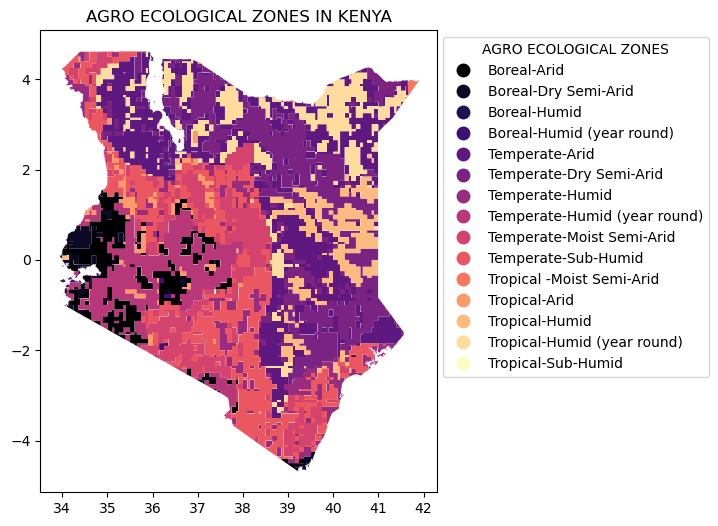

In [134]:
# Creating plot
fig, ax = plt.subplots(figsize=(10, 6))
kenyaagro_data.plot(column="value", cmap="magma", ax=ax, legend=True)
plt.title("AGRO ECOLOGICAL ZONES IN KENYA")

# Adding a legend
legend = ax.get_legend()
legend.set_title("AGRO ECOLOGICAL ZONES LIST")
legend.set_bbox_to_anchor((1.7, 1)) 
plt.show()

# LAND COVER

In [87]:
kenya_land=gpd.read_file(r'C:\Users\Samoei\Desktop\git projects\KEN_Kenya_SDPT_Landcover.json')
kenya_land.head()

,final_id,iso,country,org_name,common_name,species,species_simp,plant_ag,timber_ag,ever_dec,conifer_broad,hard_soft,size,source,year,geometry
0,KEN_7215,KEN,Kenya,Orchard,Unknown,Unknown,Unknown,Tree crops,Tree crops,n/a,n/a,n/a,Unknown,Open street map,Unknown,"POLYGON ((38.43522 -3.33087, 38.43530 -3.33040..."
1,KEN_7215,KEN,Kenya,Orchard,Unknown,Unknown,Unknown,Tree crops,Tree crops,n/a,n/a,n/a,Unknown,Open street map,Unknown,"POLYGON ((40.84254 -2.31403, 40.84204 -2.31369..."
2,KEN_7215,KEN,Kenya,Orchard,Unknown,Unknown,Unknown,Tree crops,Tree crops,n/a,n/a,n/a,Unknown,Open street map,Unknown,"POLYGON ((40.84454 -2.31252, 40.84432 -2.31200..."
3,KEN_7215,KEN,Kenya,Orchard,Unknown,Unknown,Unknown,Tree crops,Tree crops,n/a,n/a,n/a,Unknown,Open street map,Unknown,"POLYGON ((40.86680 -2.29576, 40.86732 -2.29557..."
4,KEN_7215,KEN,Kenya,Orchard,Unknown,Unknown,Unknown,Tree crops,Tree crops,n/a,n/a,n/a,Unknown,Open street map,Unknown,"POLYGON ((40.87098 -2.29469, 40.87121 -2.29435..."


In [102]:
kenya_land['plant_ag'].unique()

array(['Tree crops', 'Planted forest'], dtype=object)

In [103]:
kenya_land['timber_ag'].unique()

array(['Tree crops', 'Unknown'], dtype=object)

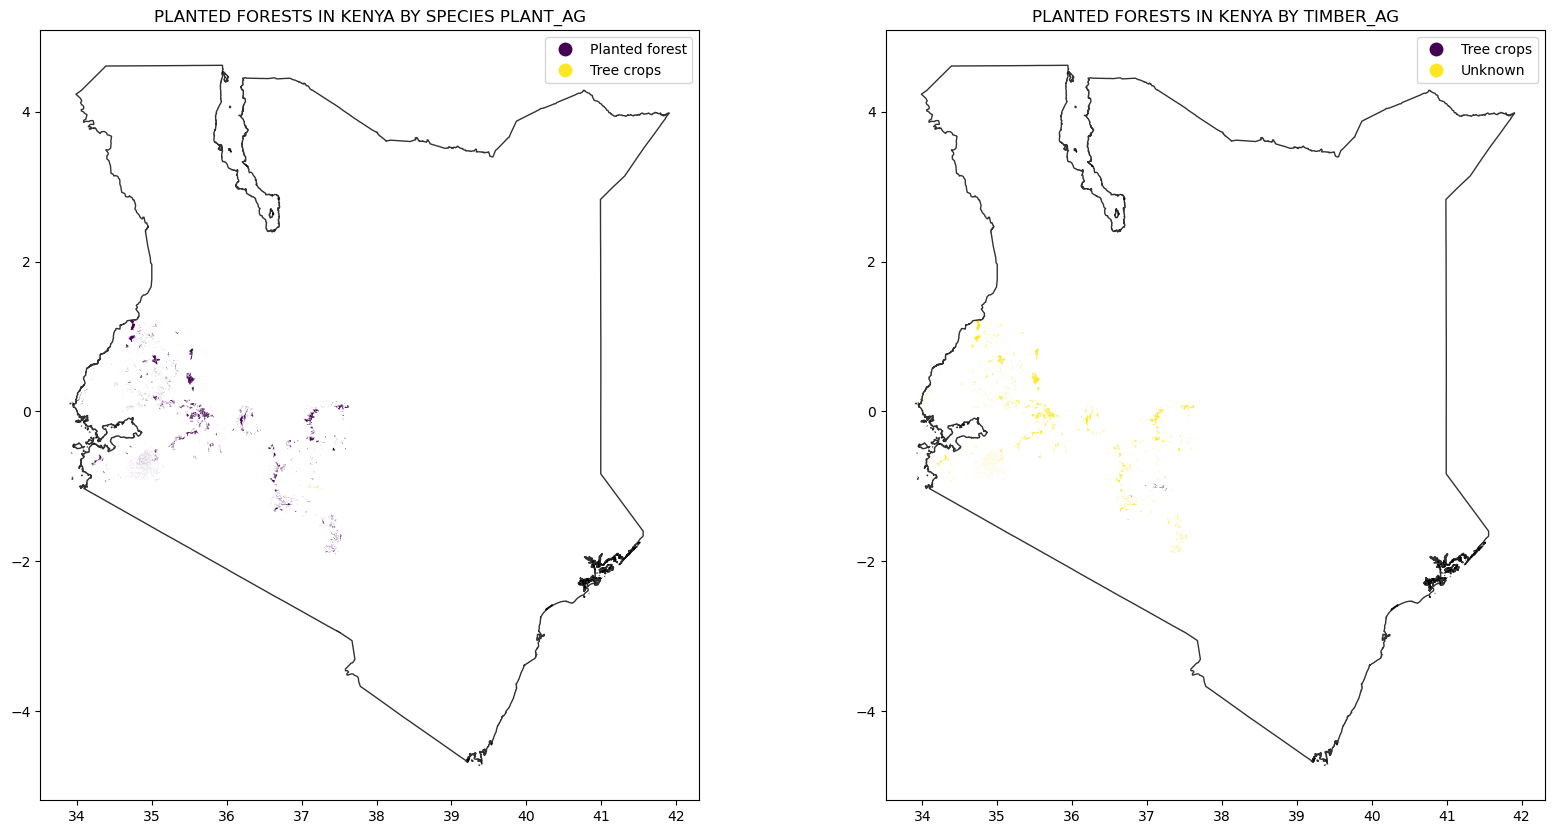

In [104]:
# Create subplot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot the hotspots by name in panel 1
kenya_land.plot(column="plant_ag", cmap="viridis", ax=ax1, legend=True)
kenya_adm.plot(ax=ax1, color="none", edgecolor="black", alpha = 0.8)
ax1.set_title("PLANTED FORESTS IN KENYA BY SPECIES PLANT_AG")

# Plot the planted forests by type in panel 2
kenya_land.plot(column="timber_ag", cmap="viridis", ax=ax2, legend=True)
kenya_adm.plot(ax=ax2, color="none", edgecolor="black", alpha = 0.8)
ax2.set_title("PLANTED FORESTS IN KENYA BY TIMBER_AG")


plt.show()

# SOIL 

In [16]:
kenya_soil= gpd.read_file(r"C:\Users\Samoei\Desktop\git projects\KEN_AL2_Kenya_WSR.json")
kenya_soil

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,KEN,,Kenya,CL,29,Calcisol,2,"MULTIPOLYGON (((36.69084 2.83062, 36.69098 2.8..."
1,KEN,,Kenya,FR,26,Ferralsol,2,"MULTIPOLYGON (((34.11435 -0.21476, 34.11357 -0..."
2,KEN,,Kenya,LP,18,Leptosol,2,"POLYGON ((35.66344 4.61783, 35.66222 4.61778, ..."
3,KEN,,Kenya,LX,6,Lixisol,2,"MULTIPOLYGON (((39.37022 -4.65964, 39.36823 -4..."
4,KEN,,Kenya,NT,24,Nitisol,2,"MULTIPOLYGON (((39.20660 -4.67241, 39.20632 -4..."
5,KEN,,Kenya,VR,5,Vertisol,2,"MULTIPOLYGON (((35.12579 -1.51441, 35.13395 -1..."
6,KEN,,Kenya,WAT,99,Waterbodies,2,"MULTIPOLYGON (((34.09227 -0.98362, 34.09143 -0..."


In [17]:
type(kenya_soil)

geopandas.geodataframe.GeoDataFrame

In [18]:
# check the number of rows and columns 
kenya_soil.shape

(7, 8)

In [19]:
# check the number of unique values in the IPCC Column 
kenya_soil['IPCC'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Calcisol
1      Ferralsol
2       Leptosol
3        Lixisol
4        Nitisol
5       Vertisol
6    Waterbodies
Name: IPCC, dtype: object>

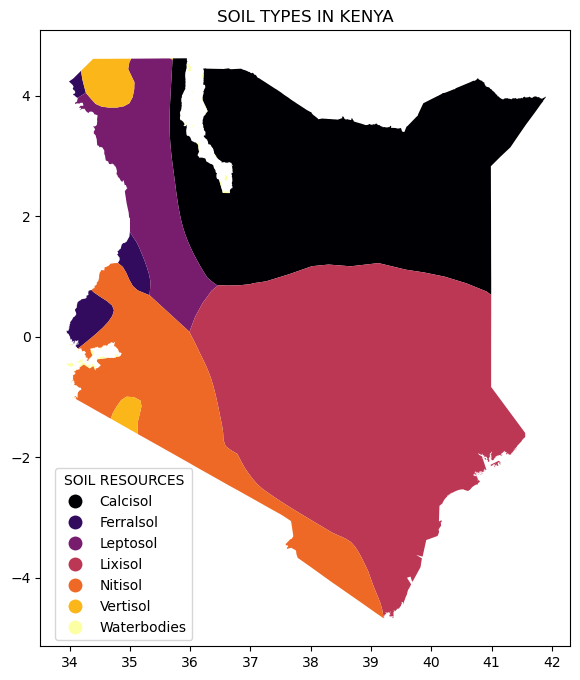

In [39]:
# Creating a plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the ecological zones
kenya_soil.plot(column="IPCC", cmap="inferno", ax=ax, legend=True)

plt.title("SOIL TYPES IN KENYA")
legend = ax.get_legend()
legend.set_title("SOIL RESOURCES")
legend.set_bbox_to_anchor((0.3, 0.3)) 
plt.show()

- From the above figure, we can conclude that Lixisol and Calcisol are the most common soil types in Kenya. The least common is Waterbodies. 

## CLIMATE

In [108]:
import json
with open(r"C:\Users\Samoei\Downloads\IPCC_ClimateZoneMap_Vector.geojson") as file:
    climate = json.load(file)

In [109]:
climate_data = gpd.GeoDataFrame.from_features(climate['features'])
climate_data.head()

,geometry,CLASS_NAME
0,"MULTIPOLYGON (((-37.65000 83.50000, -37.65000 ...",0
1,"MULTIPOLYGON (((-38.75000 83.40000, -38.75000 ...",0
2,"MULTIPOLYGON (((-38.60000 83.40000, -38.60000 ...",0
3,"MULTIPOLYGON (((-37.15000 83.40000, -37.15000 ...",0
4,"MULTIPOLYGON (((-40.40000 83.40000, -40.40000 ...",5


In [110]:
# Perform a spatial join to select roads within Kenya
kenya_climate = gpd.sjoin(climate_data, kenya_adm, how="inner", op="intersects")

# Reset the index of the resulting GeoDataFrame
kenya_climate.reset_index(drop=True, inplace=True)

In [111]:
kenya_climate["CLASS_NAME"].unique()

array([ 9,  2,  3,  1, 12, 11,  0], dtype=int64)

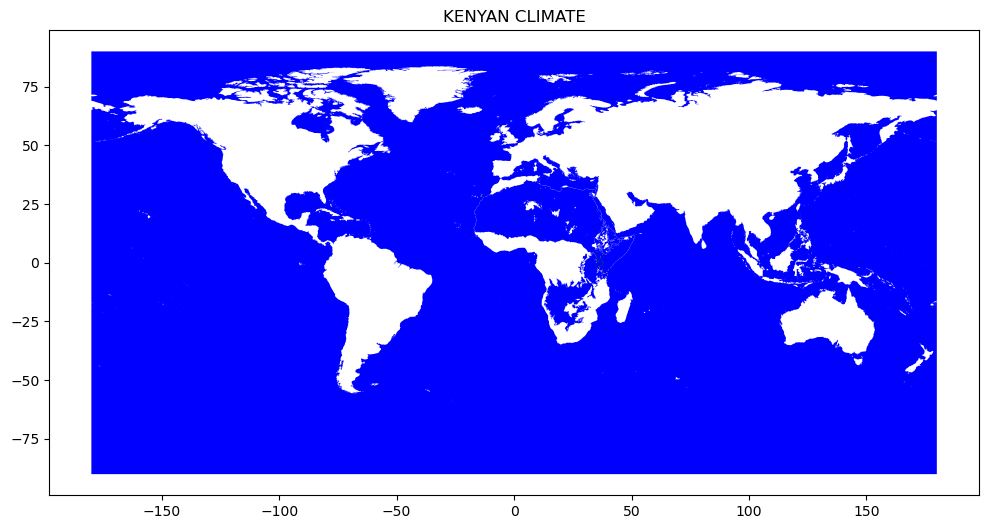

In [112]:
# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the administrative boundary of Kenya
kenya_adm.plot(ax=ax, color="green", edgecolor="yellow")

# Plot the climate condition
kenya_climate.plot(ax=ax, color="blue", linewidth=0.5)

plt.title("KENYAN CLIMATE")

plt.show()

## CONCLUSION

Kenya, with an area of 224,081 square miles (580,367 square kilometers), is located at the East side of Africa. From the above analysis, we can draw the following insights:

ADMINISTRATIVE: Kenya has 47 states/counties with the largest being Turkana County, the former Rift Valley Province of Kenya. It is Kenya's largest county by land area of 71,597.8km2 followed by Marsabit County with an area of 66,923.1km2. Mombasa County which is located in the South Eastern part of the Coastal region of Kenya,is the smallest county in Kenya, covering an area of 219.9 Km2 (excluding 65 Km2 of water mass), yet Mombasa County has the fourth highest average contribution to Gross Domestic Product (GDP) in Kenya at 4.7%. Kenya also has an extensive road coverage, both in the rural and urban areas. However, most roads are concentrated in the urban areas.

BIOCLIMATIC AND ECOLOGICAL ZONES: More than half of the country is covered by Tropical scrubland, where the annual precipitation is seasonal to monsoonal and typically varies from 50-150 cm. Here, the main vegetations are scrubs and herbs. Other ecological zones are  Tropical dry forest, Tropical moist forest, Tropical mountain system, Tropical rainforest and Water. The country has the following agroecological zones: Tropical-Humid, Temperate-Dry Semi-Arid, Temperate-Dry Semi-Arid, Tropical-Humid, Temperate-Dry Semi-Arid, Temperate-Moist Semi-Arid,Tropical-Arid, Temperate-Moist Semi-Arid, Tropical-Arid, Tropical-Humid (year round), Tropical Sub-Humid, Boreal-Arid,Borel-Dry Semi-Arid, Boreal-Humid and Boreal-Humid(year round)

LAND COVER: The main plants in Kenya are Tree crops. Less information was found concerning this variables. 

SOIL: The main soil type in the Kenya is  Lixisol and Calcisol. Others are Ferralsol, Leptosol, Nitisol, Vertisol and Waterbodies






### References
Agrawal.R. (July 13th, 2022).A Beginner’s Guide to Geospatial Data Analysis. https://www.analyticsvidhya.com/blog/2022/06/an-beginners-guide-to-geospatial-data-analysis/

kenya Embassy-Washinton D.C. About Kenya-Geography. https://kenyaembassydc.org/aboutkenyageography/
